In [1]:
import os
import pickle
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import mercury as mr

In [2]:
app = mr.App(title="Predict iris class", description="Predict iris class with Random Forest",)

mercury.App

In [3]:
petal_length = mr.Numeric(label="Petal length", min=1, max=7, value=3.5, step=0.1)

mercury.Numeric

In [4]:
petal_width = mr.Numeric(label="Petal width", min=0, max=2.5, value=1.2, step=0.1)

mercury.Numeric

In [5]:
sepal_length = mr.Numeric(label="Setal length", min=4, max=8, value=6, step=0.1)

mercury.Numeric

In [6]:
sepal_width = mr.Numeric(label="Setal width", min=2, max=4.5, value=3, step=0.1)

mercury.Numeric

In [7]:
sample = pd.DataFrame({"sepal length (cm)": [sepal_length.value],
                       "sepal width (cm)": [sepal_width.value],
                       "petal length (cm)": [petal_length.value],
                       "petal width (cm)": [petal_width.value]})

In [8]:
sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.0,3.0,3.5,1.2


In [9]:
X, y = load_iris(return_X_y=True, as_frame=True)

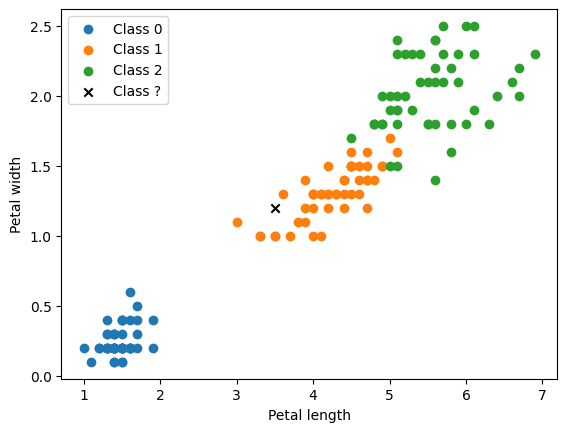

In [10]:
for i in range(3):
    ii = y == i
    plt.scatter(X["petal length (cm)"][ii], X["petal width (cm)"][ii], label=f"Class {i}")
plt.scatter(sample["petal length (cm)"], sample["petal width (cm)"], label="Class ?", 
                marker="x", color="black")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
_=plt.legend()

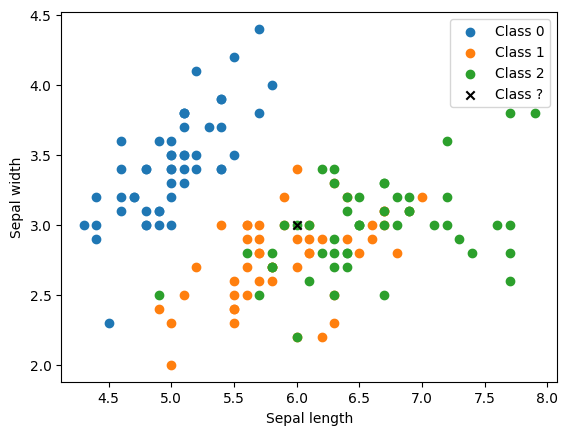

In [15]:
for i in range(3):
    ii = y == i
    plt.scatter(X["sepal length (cm)"][ii], X["sepal width (cm)"][ii], label=f"Class {i}")
plt.scatter(sample["sepal length (cm)"], sample["sepal width (cm)"], label="Class ?", marker="x", color="black")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
_=plt.legend()

In [19]:
model_file = mr.File("Upload model")

mercury.File

In [ ]:
rf = pickle.load(open("random-forest.pickle", "rb"))

In [20]:
if model_file.filepath is not None:
    rf = pickle.load(open(model_file.filepath, "rb"))

In [21]:
predicted_class = rf.predict(sample)[0]

In [22]:
mr.Markdown(f"## Predicted class {predicted_class}")

## Predicted class 1